In [7]:
## 🌦️ Project Purpose

##This project goes beyond just forecasting temperature. It aims to **help people detect unusual or extreme patterns in daily weather** — acting as an early signal for days that might require extra caution or preparedness.

##By using LSTM (Long Short-Term Memory) neural networks to analyze historical weather data, the model can detect trends and forecast upcoming conditions. This information could assist in:
##- Planning travel or outdoor events
##- Anticipating unusual temperature spikes or drops
##- Supporting decision-making in sensitive environments (schools, construction, elderly care, etc.)

!pip install --upgrade tensorflow

import pandas as pd
df = pd.read_csv("Daily_Weather_Data.csv")
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc= True)
df.set_index('Formatted Date', inplace = True)
df.sort_index(inplace = True)
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Formatted Date,,,,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,0,1016.660000
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,142.750000,11.348487,0,1011.985000
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,164.583333,8.492079,0,1010.384167
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,252.541667,9.223958,0,1021.170833
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,35.000000,8.352546,0,981.770833


In [8]:
df = pd.read_csv("Daily_Weather_Data.csv")
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.set_index('Formatted Date', inplace=True)
df.sort_index(inplace=True)

# Resample to daily average
df_daily = df.resample('D').mean()


In [9]:
from sklearn.preprocessing import MinMaxScaler
visibility = df[['Visibility (km)']].copy()

scaler = MinMaxScaler()
visibility_scaled = scaler.fit_transform(visibility)

print(visibility_scaled[:5])



[[0.62681663]
 [0.71262479]
 [0.53325751]
 [0.57921564]
 [0.52449556]]


In [10]:
import numpy as np
def create_sequences(data, window_size=7):
    X,y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)
X, y = create_sequences(visibility_scaled, window_size=7)

print("X shape:", X.shape)
print("Y shape:", y.shape)

X shape: (4012, 7, 1)
Y shape: (4012, 1)


In [11]:
split_index = int(0.8*len(X))
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (3209, 7, 1)
y_train: (3209, 1)
X_test: (803, 7, 1)
y_test: (803, 1)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(units =50, activation = 'tanh', input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer ='adam', loss ='mse')
history = model.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))

C:\Users\omar7\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1471 - val_loss: 0.0365
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - val_loss: 0.0353
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - val_loss: 0.0340
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - val_loss: 0.0325
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186 - val_loss: 0.0313
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 - val_loss: 0.0302
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - val_loss: 0.0290
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - val_loss: 0.0279
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - val_loss: 0.0282
Epoch 10/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - val_loss: 0.0265
Epoch 11/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - val_loss: 0.0255
Epoch 12/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


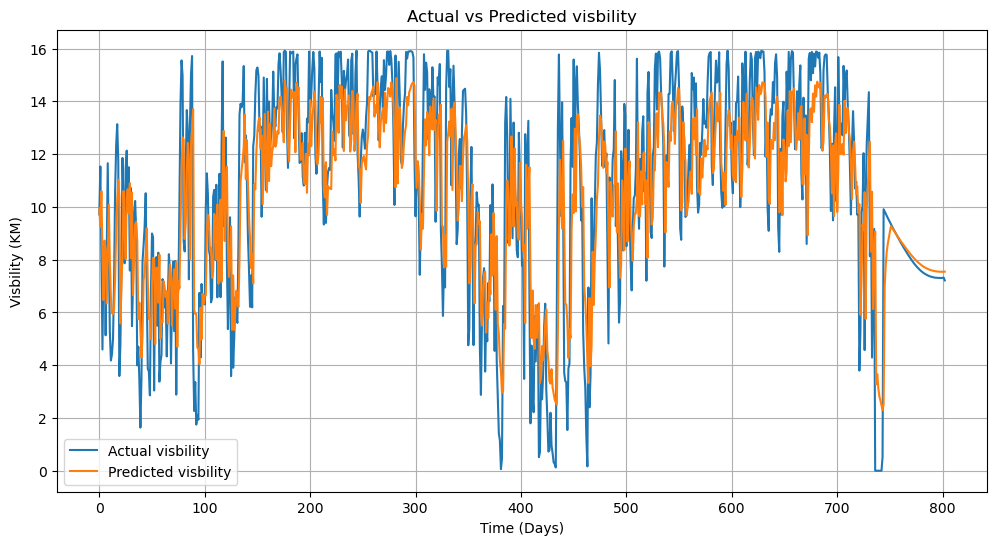

In [13]:
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)

y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Actual visbility")
plt.plot(y_pred_inv, label="Predicted visbility")
plt.title("Actual vs Predicted visbility")
plt.xlabel("Time (Days)")
plt.ylabel("Visbility (KM)")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 2.4013083044235874
MAE: 1.881615006090047


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/20


C:\Users\omar7\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1023 - val_loss: 0.0346
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0208 - val_loss: 0.0336
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0202 - val_loss: 0.0324
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0184 - val_loss: 0.0311
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 - val_loss: 0.0299
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - val_loss: 0.0289
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175 - val_loss: 0.0278
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0178 - val_loss: 0.0270
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - val_loss: 0.0261
Epoch 10/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - val_loss: 0.0254
Epoch 11/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - val_loss: 0.0248
Epoch 12/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [16]:
model.save("Machine_learning.keras")


In [30]:
threshold = 3.0  # define your own logic
anomalies = np.abs(y_pred_inv - y_test_inv) > threshold
print("⚠️ Unusual days detected:", np.sum(anomalies))


⚠️ Unusual days detected: 163
